In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/home/olimar/github_repos/EvMatsim/output/ITERS/it.6/6.countscompare.txt", sep="\t")

In [3]:
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,100,40001,1,125,127,-0.016,0.016,0.178
1,100,40001,2,208,86,1.419,0.587,10.062
2,100,40001,3,175,75,1.333,0.571,8.944
3,100,40001,4,166,84,0.976,0.494,7.334
4,100,40001,5,294,150,0.960,0.490,9.665


In [4]:
minidx = np.argmin(np.abs(df['Relative Error'].values)) 
df.iloc[minidx]

Link Id                       1340.0
Count Station Id             99365.0
Hour                             3.0
MATSIM volumes                   7.0
Count volumes                    7.0
Relative Error                   0.0
Normalized Relative Error        0.0
GEH                              0.0
Name: 2738, dtype: float64

In [5]:
optimized_hour_sum = df.groupby("Hour")["Count volumes"].sum()

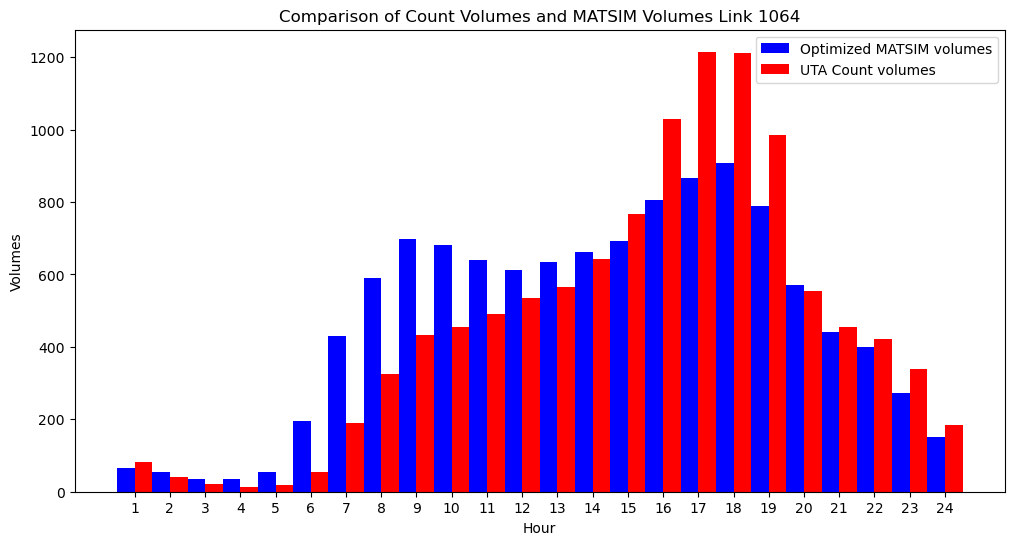

In [6]:
link = 1064
df_link = df[df["Link Id"] == link]

unique_hours = pd.unique(df_link["Hour"])
bar_width = 0.5  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))

plt.bar(
    r1, df_link["MATSIM volumes"], color="blue", width=bar_width, label="Optimized MATSIM volumes"
)
plt.bar(
    r2, df_link["Count volumes"], color="red", width=bar_width, label="UTA Count volumes"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.title(f"Comparison of Count Volumes and MATSIM Volumes Link {link}")
plt.xticks([r + (bar_width / 2) for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()

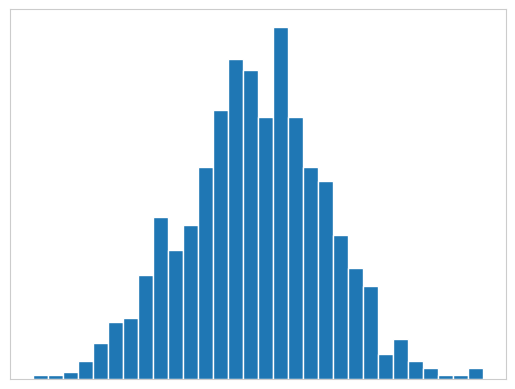

In [7]:
sns.set_style("whitegrid")
x = np.random.normal(10, 3, size=1000)
x.clip(0, np.inf, out=x)
plt.xticks([])
plt.yticks([])
plt.hist(x, bins=30)
plt.show()